In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import
df_train_feat = pd.read_csv('../data/_raw/Training set values - 4910797b-ee55-40a7-8668-10efd5c1b960.csv', index_col='id')
df_train_labels = pd.read_csv('../data/_raw/Training set labels - 0bf8bc6e-30d0-4c50-956a-603fc693d966.csv', index_col='id')
df_contest = pd.read_csv('../data/_raw/Test set values - 702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv', index_col='id')


In [3]:
df_train = df_train_feat.merge(df_train_labels, right_index=True, left_index=True)
df_train['is_train'] = 1
df_train['is_contest'] = 0
df_train

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,1,0
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1,0
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,1,0
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,1,0


In [4]:
df_contest['status_group'] = 'n/a'
df_contest['is_train'] = 0
df_contest['is_contest'] = 1
df_contest

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,n/a,0,1
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,...,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,n/a,0,1
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,n/a,0,1
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,dry,dry,shallow well,shallow well,groundwater,other,other,n/a,0,1
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,n/a,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,n/a,0,1
18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1
28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,...,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,n/a,0,1


In [5]:
############################
############################

is_training_data_only = 0

############################
############################

In [6]:
# setting the dataframe for feature engineering
# might have to include the contest set and split back out after ETL ??


# use both training and contest
# appends on top of each other (vertically)

if is_training_data_only == 1:
    df = df_train
else:
    df = df_train.append(df_contest)

df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,1,0
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1,0
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,n/a,0,1
18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1
28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,...,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,n/a,0,1


# feature engineering
=====================================

# ^^^^^^^ quantitative features

### immute - Construction Year
===============================

In [7]:
# attempt to find clustering/relationship between construction year and some other features
# basin looks pretty good. as does source class (but this might be too broad)

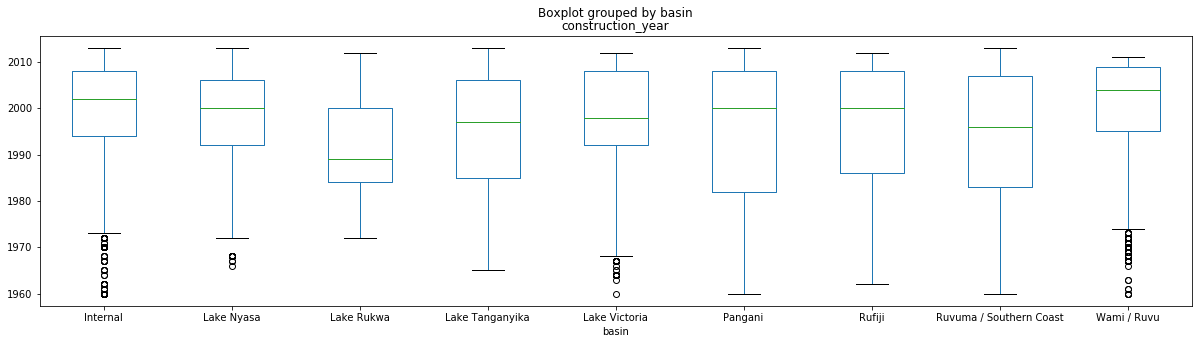

In [8]:
df[['basin', 'construction_year']][df['construction_year']!=0].boxplot(column='construction_year', by='basin',  grid=False, figsize=(20,5))

In [9]:
non_0_median_constr_year_by_basin = df[['basin', 'construction_year']][df['construction_year']!=0].groupby('basin').median().to_dict()
non_0_median_constr_year_by_basin

{'construction_year': {'Internal': 2002,
  'Lake Nyasa': 2000,
  'Lake Rukwa': 1989,
  'Lake Tanganyika': 1997,
  'Lake Victoria': 1998,
  'Pangani': 2000,
  'Rufiji': 2000,
  'Ruvuma / Southern Coast': 1996,
  'Wami / Ruvu': 2004}}

In [10]:
non_0_median_constr_year_by_basin['construction_year']['Internal']

2002

In [11]:
list(non_0_median_constr_year_by_basin['construction_year'].keys())

['Internal',
 'Lake Nyasa',
 'Lake Rukwa',
 'Lake Tanganyika',
 'Lake Victoria',
 'Pangani',
 'Rufiji',
 'Ruvuma / Southern Coast',
 'Wami / Ruvu']

In [12]:
for basin in list(non_0_median_constr_year_by_basin['construction_year'].keys()):
    df.loc[(df['construction_year'] == 0) & (df['basin'] == basin), 'construction_year'] =\
    non_0_median_constr_year_by_basin['construction_year'][basin]

In [13]:
len(df[df['construction_year'] == 0])

0

In [14]:
df[['basin', 'construction_year']][df['construction_year']==0].groupby('basin').median()

,construction_year
basin,


### immute  - Latitude / Longitude
===============================

In [15]:
df['region'][df['longitude']==0].value_counts()

Shinyanga    1259
Mwanza       1010
Name: region, dtype: int64

In [16]:
df['region'][df['latitude'] == -2.000000e-08].value_counts()

Shinyanga    1259
Mwanza       1010
Name: region, dtype: int64

it is observed  that the wells with missing longitude and latutde are only in 2 regions:

Shinyanga, Tanzania
- https://www.latlong.net/place/shinyanga-tanzania-21938.html
- Latitude: -3.680996
- Longitude: 33.427139

Mwanza, Tanzania
- https://www.latlong.net/place/mwanza-malawi-10498.html
- Latitude: -15.609150
- Longitude: 34.522820

https://www.pgc.umn.edu/apps/convert/

however for simplicity, will take the median as a quick substitute (with the 0's filtered out).
(geographic coordinates appear to be a bad fit for the existing dataset)


In [17]:
# zero_val = 0
# region = Shinyanga
# df[['latitude', 'region']].query("(latitude == 0) & (region == 'Shinyanga')")

df[(df['latitude']== -2.000000e-08) & (df['region'] == 'Shinyanga')]

# df.query("latitude == -2.000000e-08 & region == 'Shinyanga'")

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,...,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,0
72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,...,enough,enough,shallow well,shallow well,groundwater,other,other,non functional,1,0
45415,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Upendo,0,Lake Victoria,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair,1,0
32089,0.0,2012-10-29,Government Of Tanzania,0,DWE,0.0,-2.000000e-08,Igunabarui,0,Lake Victoria,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65912,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Igunabangokolo,0,Lake Victoria,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1
27394,0.0,2013-02-06,Dwssp,0,DWE,0.0,-2.000000e-08,Ng'Wababili,0,Lake Victoria,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1
31381,0.0,2012-10-23,Lwi,0,LWI,0.0,-2.000000e-08,Mikuyuni,0,Lake Victoria,...,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1


In [18]:
# helper function
def fill_0_lat_long(lat_or_long, region):
    '''fills the 0 or near 0 lat or long based on the region
    '''
    if lat_or_long == 'latitude':
        zero_val = -2.000000e-08
    elif lat_or_long == 'longitude':
        zero_val = 0
    else:
        zero_val = 0
    
    # get the median lat/long and fill with that
    fill_value = np.median(df[lat_or_long][(df[lat_or_long]!=zero_val) & (df['region'] == region)].apply(lambda val: float(val)))
    
    df.loc[(df[lat_or_long] == zero_val) & (df['region'] == region), lat_or_long] = fill_value
    # assert len(df.query('"' + lat_or_long +  " == " + str(zero_val) + " & region == '"+ region +"'")) == 0
    
    assert len(df[(df[lat_or_long]== zero_val) & (df['region'] == region)]) == 0

In [19]:
# using median to fill long/lat due to ease of implementation and less skewed than average

np.median(df['longitude'][(df['longitude']!=0) & (df['region']=='Mwanza')].apply(lambda val: float(val)))

33.08669296

In [20]:
fill_0_lat_long('latitude', 'Mwanza')
fill_0_lat_long('longitude', 'Mwanza')

In [21]:
fill_0_lat_long('latitude', 'Shinyanga')
fill_0_lat_long('longitude', 'Shinyanga')

In [22]:
df[['region', 'latitude', 'longitude']][df['region']=='Mwanza']

,region,latitude,longitude
id,,,
34169,Mwanza,-1.947868,32.920154
32376,Mwanza,-2.635341,33.086693
68717,Mwanza,-2.378772,32.185517
29083,Mwanza,-3.009659,33.079504
41839,Mwanza,-2.690442,32.993701
...,...,...,...
70737,Mwanza,-3.052205,32.997227
56279,Mwanza,-2.635341,33.086693
61040,Mwanza,-2.443566,32.314557


In [23]:
df[['region', 'longitude']][df['longitude']==33.0818363]

,region,longitude
id,,
60979,Mwanza,33.081836


### immute  - gps_height
===============================

- observed that many pumps have gps_height of 0.
- are these really at sea level? since the majority of the costal region is near or at sea level ... or in other words gps_heigt = 0... still better to check and make sure.
- will take the approximate elevation of each region and substitude accordingly

OR

- filter out the zero's and avg the remaining values to backfill the zero's (?) --> won't be consistent because i.e. Mbeya has all 0's for the elevation


In [24]:
# (sourced from google)
# regions and their elevations

regions = [
'Dar es Salaam',
'Dodoma',
'Kagera',
'Lindi',
'Mbeya',
'Morogoro',
'Mtwara',
'Mwanza',
'Pwani',
'Shinyanga',
'Tabora',
'Tanga'
]

heights_m = [
    30,
    1120,
    1300,
    30,
    1700,
    500,
    113,
    1140,
    53,
    1158,
    1200,
    300
]

dict_gps_height=dict(zip(regions,heights_m)) 

In [25]:
def get_0_gps_height(dict, region):
    '''
    takes a region and returns a height (sourced from google)
    ''' 
    assert region in dict_gps_height
    
    return dict_gps_height[region]

In [26]:
df['region'][df['gps_height']==0].value_counts()

Shinyanga        6076
Mbeya            5758
Kagera           4174
Mwanza           3426
Dodoma           2779
Tabora           2466
Tanga             620
Morogoro          310
Pwani              28
Dar es Salaam       5
Lindi               4
Mtwara              3
Name: region, dtype: int64

In [27]:
# let's look at the median and avg heights for these regions

df_non_0_gps_height = df[['region', 'gps_height']][(df['gps_height']!=0) & (df['region'].isin(regions))]

In [28]:
df_non_0_gps_height

,region,gps_height
id,,
67743,Mtwara,263
49056,Pwani,62
34169,Mwanza,1162
55012,Lindi,200
6696,Pwani,180
...,...,...
66059,Mtwara,331
8471,Pwani,78
57539,Pwani,-7


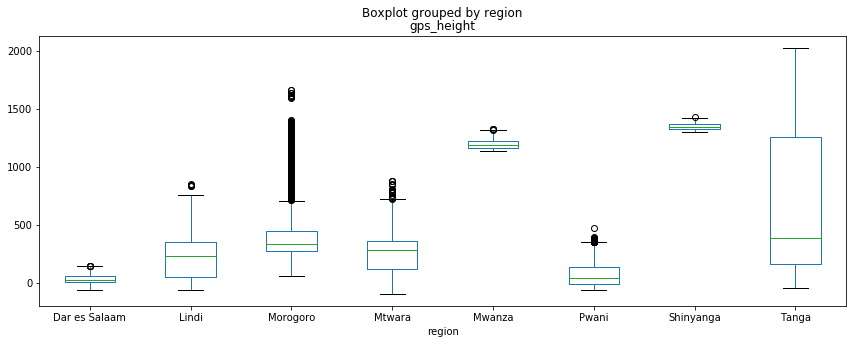

In [29]:
df_non_0_gps_height.boxplot(column='gps_height', by='region',  grid=False, figsize=(14,5))
# as we can see, there is some spread in the data, especially in Morogoro so we will use median as the aggregator to immute

In [30]:
df_non_0_gps_height.groupby('region').median()

,gps_height
region,
Dar es Salaam,28
Lindi,233
Morogoro,333
Mtwara,287
Mwanza,1188
Pwani,48
Shinyanga,1348
Tanga,386


In [31]:
dict_non_0_gps_height_median = df_non_0_gps_height.groupby('region').median().to_dict()
dict_non_0_gps_height_median

{'gps_height': {'Dar es Salaam': 28,
  'Lindi': 233,
  'Morogoro': 333,
  'Mtwara': 287,
  'Mwanza': 1188,
  'Pwani': 48,
  'Shinyanga': 1348,
  'Tanga': 386}}

In [32]:
# loop thru each region and back fill the zero gps height (using median)
for region in regions:
    df.loc[(df['gps_height'] == 0) & (df['region'] == region), 'gps_height'] =\
    get_0_gps_height(dict_non_0_gps_height_median, region)

In [33]:
# remaining regions, back fill based on gps_heights found in google
# loop thru each region and back fill the zero gps height
for region in regions:
    df.loc[(df['gps_height'] == 0) & (df['region'] == region), 'gps_height'] =\
    get_0_gps_height(dict_gps_height, region)

In [34]:
df[df['gps_height']==0]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,


In [35]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,1,0
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1,0
19728,0.0,2011-07-13,Action In A,1300,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,n/a,0,1
18990,1000.0,2011-03-21,Hiap,300,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1
28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,...,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,n/a,0,1


### immute  - amount_tsh
===============================

In [36]:
# almost 70% of the pumps are missing their total static head.
# will try to infer their values based on pump type/class

# in the perfect world, we would be able to calculate this value using the respective discharge/suction elevations 
# but that data is too granualr and not available.
# note: in theory, it is technically possible to have pump circuits at 0 tsh 
# but in this application (potable water in an natural, outdoor setting) it is not practical 
# (too much energy/work would be required to bring the water to the required discharge level)


In [37]:
non_0_tsh = df[['amount_tsh', 'extraction_type_class', 'extraction_type_group', 'extraction_type']][df['amount_tsh'] != 0]

In [38]:
non_0_tsh

,amount_tsh,extraction_type_class,extraction_type_group,extraction_type
id,,,,
69572,6000.0,gravity,gravity,gravity
34310,25.0,gravity,gravity,gravity
9944,20.0,submersible,submersible,submersible
50409,200.0,handpump,swn 80,swn 80
48451,500.0,gravity,gravity,gravity
...,...,...,...,...
45017,1000.0,gravity,gravity,gravity
71252,500.0,handpump,india mark ii,india mark ii
7869,3000.0,gravity,gravity,gravity


In [39]:
# mean tsh by extraction type class (non zero)
non_0_tsh.groupby('extraction_type_class').mean()

,amount_tsh
extraction_type_class,
gravity,1179.349057
handpump,1077.988208
motorpump,1261.587302
other,1000.579911
rope pump,816.791045
submersible,747.792023
wind-powered,176.142857


In [40]:
non_0_tsh.groupby('extraction_type_group').mean()

,amount_tsh
extraction_type_group,
afridev,1232.817029
gravity,1179.349057
india mark ii,1567.325810
india mark iii,59.607843
mono,1175.800215
nira/tanira,694.749764
other,1000.579911
other handpump,1909.000000
other motorpump,6966.428571


In [41]:
non_0_tsh.groupby('extraction_type').mean()

,amount_tsh
extraction_type,
afridev,1232.817029
cemo,30.000000
climax,7500.000000
gravity,1179.349057
india mark ii,1567.325810
india mark iii,59.607843
ksb,1233.825688
mono,1175.800215
nira/tanira,694.749764


In [42]:
# median tsh by extraction type class (non zero)
non_0_tsh.groupby('extraction_type_class').median()

,amount_tsh
extraction_type_class,
gravity,500.0
handpump,500.0
motorpump,50.0
other,400.0
rope pump,500.0
submersible,50.0
wind-powered,50.0


In [43]:
non_0_tsh.groupby('extraction_type_group').median()

,amount_tsh
extraction_type_group,
afridev,500.0
gravity,500.0
india mark ii,500.0
india mark iii,25.0
mono,50.0
nira/tanira,500.0
other,400.0
other handpump,1000.0
other motorpump,7500.0


In [44]:
non_0_tsh.groupby('extraction_type').median()

,amount_tsh
extraction_type,
afridev,500.0
cemo,30.0
climax,7500.0
gravity,500.0
india mark ii,500.0
india mark iii,25.0
ksb,50.0
mono,50.0
nira/tanira,500.0


In [45]:
# ultimately due to the sensitivity of outliers, we will fill the 0 values with median of [extraction_type]

In [46]:
non_0_tsh_median_by_extraction_type = non_0_tsh.groupby('extraction_type').median().to_dict()
non_0_tsh_median_by_extraction_type

{'amount_tsh': {'afridev': 500.0,
  'cemo': 30.0,
  'climax': 7500.0,
  'gravity': 500.0,
  'india mark ii': 500.0,
  'india mark iii': 25.0,
  'ksb': 50.0,
  'mono': 50.0,
  'nira/tanira': 500.0,
  'other': 400.0,
  'other - play pump': 50.0,
  'other - rope pump': 500.0,
  'other - swn 81': 1000.0,
  'submersible': 50.0,
  'swn 80': 500.0,
  'walimi': 500.0,
  'windmill': 50.0}}

In [47]:
non_0_tsh_median_by_extraction_type['amount_tsh']['cemo']

30.0

In [48]:
list(non_0_tsh_median_by_extraction_type['amount_tsh'].keys())

['afridev',
 'cemo',
 'climax',
 'gravity',
 'india mark ii',
 'india mark iii',
 'ksb',
 'mono',
 'nira/tanira',
 'other',
 'other - play pump',
 'other - rope pump',
 'other - swn 81',
 'submersible',
 'swn 80',
 'walimi',
 'windmill']

In [49]:
non_0_tsh_median_by_extraction_type_group = non_0_tsh.groupby('extraction_type_group').median().to_dict()

In [50]:
# filling in the zero tsh based on the median from the extraction_type
for ext_type in list(non_0_tsh_median_by_extraction_type['amount_tsh'].keys()):
    df.loc[(df['amount_tsh'] == 0) & (df['extraction_type'] == ext_type), 'amount_tsh'] =\
    non_0_tsh_median_by_extraction_type['amount_tsh'][ext_type]

In [51]:
# checking that all rows got filled
len(df[df['amount_tsh'] == 0])

2

In [52]:
# filling the 2 rows outliers using [extraction_type_group] since existing [extraction_type] data was not available.

df.loc[(df['amount_tsh'] == 0) & (df['extraction_type'] == 'other - mkulima/shinyanga'), 'amount_tsh'] =\
non_0_tsh_median_by_extraction_type_group['amount_tsh']['other handpump']

In [53]:
# checking that all rows got filled (s/b zero rows)
len(df[df['amount_tsh'] == 0])

0

In [54]:
# there are still 2 pumps remaining with 0 tsh(m)
(df[['amount_tsh', 'extraction_type_class', 'extraction_type_group', 'extraction_type']][df['amount_tsh'] == 0])

,amount_tsh,extraction_type_class,extraction_type_group,extraction_type
id,,,,


### immute  - population
============

In [55]:
# get a list of wards with pop == 0

In [56]:
df[['ward', 'population']][df['population'] == 0].groupby('ward').sum()

,population
ward,
Babayu,0
Badi,0
Badugu,0
Bahi,0
Bangwe,0
...,...
Zanka,0
Ziba,0
Zoissa,0


In [57]:
df[['ward']][df['population'] == 0].groupby('ward').count().index.tolist()

['Babayu',
 'Badi',
 'Badugu',
 'Bahi',
 'Bangwe',
 'Bariadi',
 'Berege',
 'Bereko',
 'Biharamulo Urban',
 'Biirabo',
 'Bonde la Songwe',
 'Bubiki',
 'Buchambi',
 'Budakwa',
 'Budekwa',
 'Budushi',
 'Bugandika',
 'Buganguzi',
 'Bugarama',
 'Bugene',
 'Bugogwe',
 'Bugomora',
 'Bugoro',
 'Bugorora',
 'Buhanda businde',
 'Buhendangabo',
 'Buhingo',
 'Buhongwa',
 'Bujashi',
 'Bujonde',
 'Bujugo',
 'Bukembe',
 'Bukene',
 'Bukiriro',
 'Bukoko',
 'Bukoli',
 'Bukombe',
 'Bukome',
 'Bukondo',
 'Bukumbi',
 'Bukundi',
 'Bukwimba',
 'Bulige',
 'Bulongwa',
 'Bulungwa',
 'Bulyakashaju',
 'Bumbuta',
 'Bumera',
 'Bumilayinga',
 'Bunambiu',
 'Bunamhala',
 'Bungulwa',
 'Bupamwa',
 'Bupandwamhela',
 'Bupigu',
 'Bureza',
 'Burungura',
 'Busanda',
 'Busangi',
 'Buseresere',
 'Busi',
 'Busilili',
 'Busisi',
 'Busole',
 'Busolwa',
 'Busongo',
 'Buswelu',
 'Buterankuzi',
 'Butimba',
 'Buyagu',
 'Buyango',
 'Buziku',
 'Buzilasoga',
 'Bwanga',
 'Bwanjai',
 'Bwera',
 'Bweranyange',
 'Chabutwa',
 'Chalangwa',
 'C

In [58]:
# 2012 census data was collected and prepared externally for all the wards

df_ward_pop_2012 = pd.read_csv('../data/external/ward_population_2012.csv', index_col='ward')
df_ward_pop_2012

,population_2012
ward,
Babayu,10126
Badi,16131
Badugu,13571
Bahi,18293
Bangwe,15453
...,...
Zanka,9886
Ziba,18893
Zoissa,6105


In [59]:
# we need to backfill using the population per pump, per ward. 
# now we get the total number of pumps in the ward (regardless of population zero or non-zero)

df_well_count_by_ward = df[['ward']].groupby('ward').size().to_frame('count')
df_well_count_by_ward

,count
ward,
Aghondi,16
Akheri,54
Arash,12
Arri,20
Arusha Chini,62
...,...
Ziwani,34
Zoissa,22
Zombo,28


In [60]:
df_well_pop_per_well_per_ward = df_ward_pop_2012.merge(df_well_count_by_ward, left_index=True, right_index=True)
df_well_pop_per_well_per_ward

,population_2012,count
ward,,
Babayu,10126,12
Badi,16131,40
Badugu,13571,21
Bahi,18293,20
Bangwe,15453,10
...,...,...
Zanka,9886,21
Ziba,18893,18
Zoissa,6105,22


In [61]:
df_well_pop_per_well_per_ward['pop_per_well_per_ward'] = (df_well_pop_per_well_per_ward['population_2012'] / df_well_pop_per_well_per_ward['count']).values.astype(int)
df_well_pop_per_well_per_ward

,population_2012,count,pop_per_well_per_ward
ward,,,
Babayu,10126,12,843
Badi,16131,40,403
Badugu,13571,21,646
Bahi,18293,20,914
Bangwe,15453,10,1545
...,...,...,...
Zanka,9886,21,470
Ziba,18893,18,1049
Zoissa,6105,22,277


In [62]:
df_well_pop_per_well_per_ward.loc['Fufu']

population_2012          3469
count                       3
pop_per_well_per_ward    1156
Name: Fufu, dtype: int64

In [63]:
dict_well_pop_per_well_per_ward = df_well_pop_per_well_per_ward.to_dict()
dict_well_pop_per_well_per_ward 

{'population_2012': {'Babayu': 10126,
  'Badi': 16131,
  'Badugu': 13571,
  'Bahi': 18293,
  'Bangwe': 15453,
  'Bariadi': 11248,
  'Berege': 10931,
  'Bereko': 7226,
  'Biirabo': 18900,
  'Bonde la Songwe': 18487,
  'Bubiki': 20038,
  'Buchambi': 13520,
  'Budekwa': 13630,
  'Budushi': 6940,
  'Bugandika': 9444,
  'Buganguzi': 10562,
  'Bugarama': 18271,
  'Bugene': 15867,
  'Bugomora': 11144,
  'Bugorora': 6905,
  'Buhendangabo': 7724,
  'Buhingo': 13871,
  'Buhongwa': 26681,
  'Bujashi': 12881,
  'Bujonde': 7528,
  'Bujugo': 7140,
  'Bukene': 7641,
  'Bukiriro': 19875,
  'Bukoko': 15985,
  'Bukoli': 16345,
  'Bukombe': 11706,
  'Bukome': 16933,
  'Bukondo': 13371,
  'Bukumbi': 26368,
  'Bukundi': 10759,
  'Bukwimba': 17335,
  'Bulige': 10505,
  'Bulongwa': 3824,
  'Bulungwa': 24642,
  'Bulyakashaju': 9951,
  'Bumbuta': 8602,
  'Bumera': 9601,
  'Bumilayinga': 6136,
  'Bunamhala': 28301,
  'Bungulwa': 10361,
  'Bupamwa': 17366,
  'Bupigu': 6145,
  'Bureza': 7472,
  'Burungura': 13354

In [64]:
wards_2012 = df_ward_pop_2012.index.values
wards_2012

array(['Babayu', 'Badi', 'Badugu', 'Bahi', 'Bangwe', 'Bariadi', 'Berege',
       'Bereko', 'Biirabo', 'Bonde la Songwe', 'Bubiki', 'Buchambi',
       'Budekwa', 'Budushi', 'Bugandika', 'Buganguzi', 'Bugarama',
       'Bugene', 'Bugomora', 'Bugorora', 'Buhendangabo', 'Buhingo',
       'Buhongwa', 'Bujashi', 'Bujonde', 'Bujugo', 'Bukene', 'Bukiriro',
       'Bukoko', 'Bukoli', 'Bukombe', 'Bukome', 'Bukondo', 'Bukumbi',
       'Bukundi', 'Bukwimba', 'Bulige', 'Bulongwa', 'Bulungwa',
       'Bulyakashaju', 'Bumbuta', 'Bumera', 'Bumilayinga', 'Bunamhala',
       'Bungulwa', 'Bupamwa', 'Bupigu', 'Bureza', 'Burungura', 'Busanda',
       'Busangi', 'Buseresere', 'Busi', 'Busilili', 'Busisi', 'Busolwa',
       'Busongo', 'Buswelu', 'Butimba', 'Buyagu', 'Buyango', 'Buziku',
       'Buzilasoga', 'Bwanga', 'Bwanjai', 'Bwera', 'Bweranyange',
       'Chabutwa', 'Chalangwa', 'Chali', 'Chambo', 'Chamkoroma',
       'Chandama', 'Changaa', 'Chato', 'Chela', 'Chemba', 'Chemchem',
       'Chibe', 'Chibele

In [65]:
df[(df['population'] == 0)]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
19728,500.0,2011-07-13,Action In A,1300,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
19816,500.0,2012-10-01,Dwsp,1158,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,1,0
54551,500.0,2012-10-09,Rwssp,1158,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,1,0
53934,500.0,2012-11-03,Wateraid,1200,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,...,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,1,0
46144,500.0,2011-08-03,Isingiro Ho,1300,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58693,500.0,2013-01-25,Rwssp,1158,DWE,32.442886,-3.644662,Busangi,0,Lake Tanganyika,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1
7869,3000.0,2011-03-11,Kkkt,2046,Commu,34.345525,-9.547077,none,0,Lake Nyasa,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,n/a,0,1
59757,500.0,2013-02-24,Villagers,1291,Villagers,35.345384,-9.831170,Kwa Reonard,0,Lake Nyasa,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,n/a,0,1


In [66]:
# testing
dict_well_pop_per_well_per_ward['pop_per_well_per_ward']['Fufu']

1156

In [67]:
# back fill the missing population for each ward via lookup:

for ward in wards_2012:
    df.loc[(df['population'] == 0) & (df['ward'] == ward), 'population'] =\
    dict_well_pop_per_well_per_ward['pop_per_well_per_ward'][ward]

In [68]:
# spot check
df['population'][(df['ward'] == 'Fufu')]

id
6449     1156
20856    1156
42912    1156
Name: population, dtype: int64

### for the remaining wards with zero population, fill using the region population, per pump

In [69]:
df['region'][df['population']==0].value_counts()

Mbeya        414
Shinyanga    379
Kagera       299
Mwanza       241
Tabora       196
Iringa       161
Dodoma       112
Kigoma        13
Ruvuma         8
Singida        1
Name: region, dtype: int64

In [70]:
df[(df['population'] == 0)]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
67359,500.0,2011-07-16,Danida,1700,Central government,33.854345,-9.638520,Office Ya Kijiji,0,Lake Nyasa,...,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,1,0
19415,500.0,2011-03-02,Roman,2328,Commu,34.284476,-9.271565,none,0,Lake Nyasa,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0
68717,500.0,2011-08-08,Swedish,1140,Sengerema Water Department,32.185517,-2.378772,Kwa Swakala,0,Lake Victoria,...,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,1,0
7116,400.0,2011-07-12,NaN,1700,NaN,33.805081,-9.130674,Kwa Mzee Kaiga,0,Lake Nyasa,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,1,0
49585,500.0,2011-10-07,Sida,1700,Central government,33.860845,-9.596084,Kwa Mwabibi Mstafa,0,Lake Nyasa,...,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42919,50.0,2011-07-30,Kashwas,1140,KASHWA,32.804272,-3.164786,Kwa Wach,0,Lake Victoria,...,enough,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe,n/a,0,1
7181,500.0,2011-07-19,Danida,1700,Central government,33.883361,-9.587648,Kwa Daudi Mwakinyuke,0,Lake Nyasa,...,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,n/a,0,1
54127,500.0,2011-03-23,Kkkt,2114,Commu,34.016214,-9.338779,none,0,Lake Nyasa,...,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,n/a,0,1


In [71]:
#via census/google

dict_region_pop_2012 = {
    'Mbeya':2707410,        
    'Shinyanga':1534808,
    'Kagera':2458023,
    'Mwanza':2772509,
    'Tabora':2291623,
    'Iringa':941238,
    'Dodoma':2083588,
    'Kigoma':2127930,
    'Ruvuma':1376891,
    'Singida':1370637
}

In [72]:
df_region_pop_2012 = pd.DataFrame(list(dict_region_pop_2012.values()), 
                                  index=dict_region_pop_2012.keys(), 
                                  columns=['population_2012'])
df_region_pop_2012

,population_2012
Mbeya,2707410
Shinyanga,1534808
Kagera,2458023
Mwanza,2772509
Tabora,2291623
Iringa,941238
Dodoma,2083588
Kigoma,2127930
Ruvuma,1376891
Singida,1370637


In [73]:
# for the remaining wards with zero population:
# we will take the avg population per region and divide by the number of wells for that region.

df_mean_pop_by_region = df[['region','population']][df['population']!=0].groupby('region').mean().round().astype(int)
df_mean_pop_by_region

,population
region,
Arusha,261
Dar es Salaam,237
Dodoma,487
Iringa,136
Kagera,469
Kigoma,516
Kilimanjaro,106
Lindi,366
Manyara,326


In [74]:
df_mean_pop_by_region.sum()

population    7422
dtype: int64

In [75]:
df_mean_pop_by_region.loc['Mbeya']['population']

286

In [76]:
list(df_region_pop_2012.index.values)

['Mbeya',
 'Shinyanga',
 'Kagera',
 'Mwanza',
 'Tabora',
 'Iringa',
 'Dodoma',
 'Kigoma',
 'Ruvuma',
 'Singida']

In [77]:
# fill the remaining populations

for region in list(df_region_pop_2012.index.values):
    df.loc[(df['population'] == 0) & (df['region'] == region), 'population'] =\
    df_mean_pop_by_region.loc[region]['population']

In [78]:
df[(df['population'] == 0)]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,


# ^^^^^^^ quanlitative features

In [79]:
from sklearn.preprocessing import OneHotEncoder

In [80]:
# change the nan's to "unknown" to be consistent with  the features that already have unknowns

In [81]:
# https://www.datacamp.com/community/tutorials/categorical-data

# Many machine learning models, such as regression or SVM, are algebraic. 
# This means that their input must be numerical. 
# To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.

## 1) fillna (nan) w/ "unknown"
- these 7 cols have nans and need to be filled (obtained via Part 1):

In [82]:
cols_fill_na_w_unknown = [
    'public_meeting',
    'permit',
    'scheme_management',
    'funder',
    'installer',
    'scheme_name',
    'subvillage'    
]

for col in cols_fill_na_w_unknown:
    df[col].fillna(value='unknown', inplace=True)


In [83]:
df['public_meeting'][df['public_meeting'] == 'unknown']

id
8776     unknown
34169    unknown
6091     unknown
24593    unknown
35715    unknown
          ...   
57344    unknown
53708    unknown
32944    unknown
19620    unknown
64579    unknown
Name: public_meeting, Length: 4155, dtype: object

## 2) removing duplicates / excessive features
some features have up to 3 levels of delination. for feature engineering we will remove the "higher" levels and keep the lowest level (the level that has the most detail)

In [84]:
len(df.columns)

42

### these features have 2 levels of duplication to be removed

In [85]:
# remove [extraction_type] and [extraction_type_class]
# because there is a  lower level (more granular) feature available: [extraction_type_group]
df.drop(columns=['extraction_type', 'extraction_type_class'], axis=1, inplace=True, errors='ignore')

In [86]:
# remove [source_type] and [source_class]
# because there is a  lower level (more granular) feature available: [source]
df.drop(columns=['source_type', 'source_class'], axis=1, inplace=True, errors='ignore')

### these features have 1 level of duplication to be removed

In [87]:
# remove: [waterpoint_type_group] 6 
# keep: ['waterpoint_type'] 7
df.drop(columns=['waterpoint_type_group'], axis=1, inplace=True, errors='ignore')

In [88]:
# remove: [management_group] 5, 
# keep: [management] 12
df.drop(columns=['management_group'], axis=1, inplace=True, errors='ignore')

In [89]:
# remove: [quantity_group] 5, 
# keep: ['quantity'] 5 

# exact duplicates
df.drop(columns=['quantity_group'], axis=1, inplace=True, errors='ignore')

In [90]:
# remove: [scheme_name] ~2700, 
# keep: [scheme_management] 13

# this is special because it is 
# essentially this is a frequency based binning to reduce the number of one-hot encoded features.
df.drop(columns=['scheme_name'], axis=1, inplace=True, errors='ignore')

In [91]:
len(df.columns)

34

# 3) High Cardinality (too many columns to use one hot)
# columns: lga, funder, ward, installer, subvillage
# maybe: wpt_name

- 'lga' (125)
- funder (~1900)
- 'ward' (~2100)
- installer (~2150)
- subvillage (~19300)
- wpt_name (~37400)

all have large amount of unique categories
also have nans --> do we make them "unknown"?

can we just simply exclude some of them (i.e. wpt_name) given that it is unlikely to impact predictive modelling?

https://kiwidamien.github.io/are-you-getting-burned-by-one-hot-encoding.html

https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38

https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

In [92]:
# for now i'm going to delete them until i can find a better way to deal with it
# i.e. some sort of encoding (other than one-hot)
# maybe frequency encoding

df_hold = df[
    [
        'lga',
        'funder',
        'ward',
        'installer',
        'subvillage',
        'wpt_name',
        'is_train',
        'is_contest'
    ]
]
df_hold

,lga,funder,ward,installer,subvillage,wpt_name,is_train,is_contest
id,,,,,,,,
69572,Ludewa,Roman,Mundindi,Roman,Mnyusi B,none,1,0
8776,Serengeti,Grumeti,Natta,GRUMETI,Nyamara,Zahanati,1,0
34310,Simanjiro,Lottery Club,Ngorika,World vision,Majengo,Kwa Mahundi,1,0
67743,Nanyumbu,Unicef,Nanyumbu,UNICEF,Mahakamani,Zahanati Ya Nanyumbu,1,0
19728,Karagwe,Action In A,Nyakasimbi,Artisan,Kyanyamisa,Shuleni,1,0
...,...,...,...,...,...,...,...,...
39307,Bagamoyo,Danida,Yombo,Da,Yombo,Kwambwezi,0,1
18990,Kilindi,Hiap,Mvungwe,HIAP,Mkondoa,Bonde La Mkondoa,0,1
28749,Singida Rural,unknown,Ughandi,unknown,Juhudi,Bwawani,0,1


df.drop(columns = ['lga','funder','ward','installer','subvillage','wpt_name'],
        axis=1,
        inplace=True,
        errors='ignore')

In [93]:
# add 
freq_cols = ['lga','funder','ward','installer','subvillage','wpt_name']

# make a new dataframe with only the desired col's for machine learning
df2 = df.copy()

for freq_col in freq_cols:
    df2_frequency = df2.groupby(freq_col).size()/len(df2)
    df2.loc[:,freq_col+'_freq_encode'] = df2[freq_col].map(df2_frequency)

df2.drop(columns=freq_cols, axis=1, inplace=True)
df2

,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,...,waterpoint_type,status_group,is_train,is_contest,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,...,communal standpipe,functional,1,0,0.009253,0.004525,0.000552,0.001603,0.000081,0.059798
8776,500.0,2013-03-06,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,...,communal standpipe,functional,1,0,0.012189,0.000862,0.001212,0.000673,0.000081,0.013926
34310,25.0,2013-02-25,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,...,communal standpipe multiple,functional,1,0,0.005010,0.000121,0.000175,0.006963,0.008498,0.000040
67743,50.0,2013-01-28,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,...,communal standpipe multiple,non functional,1,0,0.002869,0.017832,0.000552,0.003838,0.000323,0.000027
19728,500.0,2011-07-13,1300,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,...,communal standpipe,functional,1,0,0.013024,0.000013,0.000189,0.002276,0.000027,0.029401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,2011-02-24,34,38.852669,-6.582841,0,Wami / Ruvu,Pwani,6,1,...,communal standpipe,n/a,0,1,0.017010,0.052620,0.001818,0.003865,0.000135,0.000013
18990,1000.0,2011-03-21,300,37.451633,-5.350428,0,Pangani,Tanga,4,7,...,hand pump,n/a,0,1,0.002842,0.000094,0.000579,0.000094,0.000094,0.000013
28749,500.0,2013-03-04,1476,34.739804,-4.585587,0,Internal,Singida,13,2,...,communal standpipe,n/a,0,1,0.016189,0.060660,0.000646,0.061051,0.000498,0.001158


In [94]:
# https://stackoverflow.com/questions/47418299/python-combining-low-frequency-factors-category-counts

# apply this idea where you take the lower frequency (based on some cutoff) and turn those into "unknown" meanwhile keep the rest as is.

# 4) Encode: One - Hot Encode
These remaining columns have up to 25 unique values each.

We will use One-Hot Encoding to prepare these features for machine learning model development

### potential nominal columns (no order) -- one hot encoder -- <25 unique count

- 'basin', 'region', 
- 'public_meeting', 'recorded_by', 'scheme_management',  'permit', 
       
- 'extraction_type', 'extraction_type_group', 'extraction_type_class', 
- 'management','management_group', 
- 'payment', 'payment_type', 
  
- 'source', 'source_type', 'source_class', 
- 'waterpoint_type', 'waterpoint_type_group'

- 'water_quality', 'quality_group', 'quantity', 'quantity_group', <-- if time, convert these to ordered/ordinal

In [95]:
keep_cols = [
    'amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude',
    'num_private',
    'population', 'construction_year', 

    'status_group', 'is_train', 'is_contest']

In [96]:
one_hot_encode_cols = [
    'basin', 
    'region',
    'region_code',
    'district_code', 
    'public_meeting', 
    'recorded_by', 
    'scheme_management',
    'permit',  
    'extraction_type_group', 
    'management',
    'payment', 'payment_type', 
    'water_quality', 
    'quality_group', 
    'quantity',
    'source', 
    'waterpoint_type'
]

In [97]:
df3 = pd.get_dummies(df, prefix=one_hot_encode_cols, columns=one_hot_encode_cols)
df3

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,subvillage,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Mnyusi B,...,0,1,0,0,1,0,0,0,0,0
8776,500.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Nyamara,...,0,0,0,0,1,0,0,0,0,0
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Majengo,...,0,0,0,0,0,1,0,0,0,0
67743,50.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Mahakamani,...,0,0,0,0,0,1,0,0,0,0
19728,500.0,2011-07-13,Action In A,1300,Artisan,31.130847,-1.825359,Shuleni,0,Kyanyamisa,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Yombo,...,0,0,0,0,1,0,0,0,0,0
18990,1000.0,2011-03-21,Hiap,300,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Mkondoa,...,1,0,0,0,0,0,0,1,0,0
28749,500.0,2013-03-04,unknown,1476,unknown,34.739804,-4.585587,Bwawani,0,Juhudi,...,0,0,0,0,1,0,0,0,0,0


In [98]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df3.columns.values)

['amount_tsh' 'date_recorded' 'funder' 'gps_height' 'installer'
 'longitude' 'latitude' 'wpt_name' 'num_private' 'subvillage' 'lga' 'ward'
 'population' 'construction_year' 'status_group' 'is_train' 'is_contest'
 'basin_Internal' 'basin_Lake Nyasa' 'basin_Lake Rukwa'
 'basin_Lake Tanganyika' 'basin_Lake Victoria' 'basin_Pangani'
 'basin_Rufiji' 'basin_Ruvuma / Southern Coast' 'basin_Wami / Ruvu'
 'region_Arusha' 'region_Dar es Salaam' 'region_Dodoma' 'region_Iringa'
 'region_Kagera' 'region_Kigoma' 'region_Kilimanjaro' 'region_Lindi'
 'region_Manyara' 'region_Mara' 'region_Mbeya' 'region_Morogoro'
 'region_Mtwara' 'region_Mwanza' 'region_Pwani' 'region_Rukwa'
 'region_Ruvuma' 'region_Shinyanga' 'region_Singida' 'region_Tabora'
 'region_Tanga' 'region_code_1' 'region_code_2' 'region_code_3'
 'region_code_4' 'region_code_5' 'region_code_6' 'region_code_7'
 'region_code_8' 'region_code_9' 'region_code_10' 'region_code_11'
 'region_code_12' 'region_code_13' 'region_code_14' 'region_code_15

In [99]:
df2.drop(columns=one_hot_encode_cols, axis=1, inplace=True)
df2

,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,population,construction_year,status_group,is_train,is_contest,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode
id,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,1390,34.938093,-9.856322,0,109,1999,functional,1,0,0.009253,0.004525,0.000552,0.001603,0.000081,0.059798
8776,500.0,2013-03-06,1399,34.698766,-2.147466,0,280,2010,functional,1,0,0.012189,0.000862,0.001212,0.000673,0.000081,0.013926
34310,25.0,2013-02-25,686,37.460664,-3.821329,0,250,2009,functional,1,0,0.005010,0.000121,0.000175,0.006963,0.008498,0.000040
67743,50.0,2013-01-28,263,38.486161,-11.155298,0,58,1986,non functional,1,0,0.002869,0.017832,0.000552,0.003838,0.000323,0.000027
19728,500.0,2011-07-13,1300,31.130847,-1.825359,0,914,1998,functional,1,0,0.013024,0.000013,0.000189,0.002276,0.000027,0.029401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,2011-02-24,34,38.852669,-6.582841,0,20,1988,n/a,0,1,0.017010,0.052620,0.001818,0.003865,0.000135,0.000013
18990,1000.0,2011-03-21,300,37.451633,-5.350428,0,2960,1994,n/a,0,1,0.002842,0.000094,0.000579,0.000094,0.000094,0.000013
28749,500.0,2013-03-04,1476,34.739804,-4.585587,0,200,2010,n/a,0,1,0.016189,0.060660,0.000646,0.061051,0.000498,0.001158


In [100]:
df2.drop(columns=keep_cols, axis=1, inplace=True)
df2

,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode
id,,,,,,
69572,0.009253,0.004525,0.000552,0.001603,0.000081,0.059798
8776,0.012189,0.000862,0.001212,0.000673,0.000081,0.013926
34310,0.005010,0.000121,0.000175,0.006963,0.008498,0.000040
67743,0.002869,0.017832,0.000552,0.003838,0.000323,0.000027
19728,0.013024,0.000013,0.000189,0.002276,0.000027,0.029401
...,...,...,...,...,...,...
39307,0.017010,0.052620,0.001818,0.003865,0.000135,0.000013
18990,0.002842,0.000094,0.000579,0.000094,0.000094,0.000013
28749,0.016189,0.060660,0.000646,0.061051,0.000498,0.001158


In [101]:
df3.drop(columns=freq_cols, axis=1, inplace=True)
df3

,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,population,construction_year,status_group,is_train,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,1390,34.938093,-9.856322,0,109,1999,functional,1,...,0,1,0,0,1,0,0,0,0,0
8776,500.0,2013-03-06,1399,34.698766,-2.147466,0,280,2010,functional,1,...,0,0,0,0,1,0,0,0,0,0
34310,25.0,2013-02-25,686,37.460664,-3.821329,0,250,2009,functional,1,...,0,0,0,0,0,1,0,0,0,0
67743,50.0,2013-01-28,263,38.486161,-11.155298,0,58,1986,non functional,1,...,0,0,0,0,0,1,0,0,0,0
19728,500.0,2011-07-13,1300,31.130847,-1.825359,0,914,1998,functional,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,2011-02-24,34,38.852669,-6.582841,0,20,1988,n/a,0,...,0,0,0,0,1,0,0,0,0,0
18990,1000.0,2011-03-21,300,37.451633,-5.350428,0,2960,1994,n/a,0,...,1,0,0,0,0,0,0,1,0,0
28749,500.0,2013-03-04,1476,34.739804,-4.585587,0,200,2010,n/a,0,...,0,0,0,0,1,0,0,0,0,0


In [102]:
#combine df2 and df3 

df4 = pd.concat([df3, df2], axis=1)

In [103]:
print(df4.columns.values)

['amount_tsh' 'date_recorded' 'gps_height' 'longitude' 'latitude'
 'num_private' 'population' 'construction_year' 'status_group' 'is_train'
 'is_contest' 'basin_Internal' 'basin_Lake Nyasa' 'basin_Lake Rukwa'
 'basin_Lake Tanganyika' 'basin_Lake Victoria' 'basin_Pangani'
 'basin_Rufiji' 'basin_Ruvuma / Southern Coast' 'basin_Wami / Ruvu'
 'region_Arusha' 'region_Dar es Salaam' 'region_Dodoma' 'region_Iringa'
 'region_Kagera' 'region_Kigoma' 'region_Kilimanjaro' 'region_Lindi'
 'region_Manyara' 'region_Mara' 'region_Mbeya' 'region_Morogoro'
 'region_Mtwara' 'region_Mwanza' 'region_Pwani' 'region_Rukwa'
 'region_Ruvuma' 'region_Shinyanga' 'region_Singida' 'region_Tabora'
 'region_Tanga' 'region_code_1' 'region_code_2' 'region_code_3'
 'region_code_4' 'region_code_5' 'region_code_6' 'region_code_7'
 'region_code_8' 'region_code_9' 'region_code_10' 'region_code_11'
 'region_code_12' 'region_code_13' 'region_code_14' 'region_code_15'
 'region_code_16' 'region_code_17' 'region_code_18' 'regi

### quantitative columns

'amount_tsh', 'date_recorded', 
'gps_height',
'longitude', 'latitude',
'num_private', 
'region_code', 'district_code',

'population', 
'construction_year', 


In [104]:
# nominal vs. ordinal

# New Features
==========================

In [105]:
from datetime import date

In [106]:
# the contest launched in Feb 2015.... we will use that as the 'origin year'
# https://community.drivendata.org/t/about-the-pump-it-up-data-mining-the-water-table-category/63
    
year_origin = 2015

### pump_age_y
a quick and easy to read feature that tells us how old the pump is in years (rounds down)

In [107]:
df4['pump_age_yr'] = year_origin - df4['construction_year']

### date_recorded_age_yr
a quick and easy to read feature that tells us how old data recording of the pump is in years (rounds down)

In [108]:
df4['date_recorded_age_yr'] = year_origin - df4['date_recorded'].str[0:4].astype(int)

In [123]:
df4

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,...,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode,pump_age_yr,date_recorded_age_yr,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,109,1999,0,1,0,...,0.004525,0.000552,0.001603,0.000081,0.059798,16,4,functional,1,0
8776,500.0,1399,34.698766,-2.147466,0,280,2010,0,0,0,...,0.000862,0.001212,0.000673,0.000081,0.013926,5,2,functional,1,0
34310,25.0,686,37.460664,-3.821329,0,250,2009,0,0,0,...,0.000121,0.000175,0.006963,0.008498,0.000040,6,2,functional,1,0
67743,50.0,263,38.486161,-11.155298,0,58,1986,0,0,0,...,0.017832,0.000552,0.003838,0.000323,0.000027,29,2,non functional,1,0
19728,500.0,1300,31.130847,-1.825359,0,914,1998,0,0,0,...,0.000013,0.000189,0.002276,0.000027,0.029401,17,4,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,20,1988,0,0,0,...,0.052620,0.001818,0.003865,0.000135,0.000013,27,4,n/a,0,1
18990,1000.0,300,37.451633,-5.350428,0,2960,1994,0,0,0,...,0.000094,0.000579,0.000094,0.000094,0.000013,21,4,n/a,0,1
28749,500.0,1476,34.739804,-4.585587,0,200,2010,1,0,0,...,0.060660,0.000646,0.061051,0.000498,0.001158,5,2,n/a,0,1


### data quality checking

In [110]:
# curiously, there are 3 pumps which have a date_recorded older than the construction year ... perhaps this is a typo?

# df[['construction_year'] df['date_recorded'].str[0:4]
df4[['date_recorded', 'construction_year']][df4['pump_age_yr'] < df4['date_recorded_age_yr']]

,date_recorded,construction_year
id,,
20198,2004-05-01,2008
55069,2004-12-01,2006
48759,2004-06-01,2011
20534,2004-03-01,2009
53086,2004-01-07,2009
9195,2004-03-01,2005
5971,2004-03-01,2007
15921,2004-03-06,2009
1251,2004-12-01,2008


In [111]:
# check if date recorded is newer than date construction?
# in other words, has there been any data collection from the point AFTER initial installation?


# df[['construction_year'] df['date_recorded'].str[0:4]
df4[['date_recorded', 'construction_year', 'pump_age_yr','date_recorded_age_yr' ]][df4['pump_age_yr'] > df4['date_recorded_age_yr']]

,date_recorded,construction_year,pump_age_yr,date_recorded_age_yr
id,,,,
69572,2011-03-14,1999,16,4
8776,2013-03-06,2010,5,2
34310,2013-02-25,2009,6,2
67743,2013-01-28,1986,29,2
19728,2011-07-13,1998,17,4
...,...,...,...,...
39307,2011-02-24,1988,27,4
18990,2011-03-21,1994,21,4
28749,2013-03-04,2010,5,2


# cleanup

In [122]:
# remove the date_recorded from the ML dataframe as the new features will be used instead for time dependencies
df4.drop(columns='date_recorded', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# output cleaned files for modelling
===================================================

In [112]:
# output files to the interim folder... to be used for the next workbook (modeling)

# training data
# training label
# test aka contest data

In [124]:
cols_to_order = ['status_group','is_train','is_contest']
new_columns = (df4.columns.drop(cols_to_order).tolist()) + cols_to_order
df4 = df4[new_columns]
df4

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,...,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode,pump_age_yr,date_recorded_age_yr,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,109,1999,0,1,0,...,0.004525,0.000552,0.001603,0.000081,0.059798,16,4,functional,1,0
8776,500.0,1399,34.698766,-2.147466,0,280,2010,0,0,0,...,0.000862,0.001212,0.000673,0.000081,0.013926,5,2,functional,1,0
34310,25.0,686,37.460664,-3.821329,0,250,2009,0,0,0,...,0.000121,0.000175,0.006963,0.008498,0.000040,6,2,functional,1,0
67743,50.0,263,38.486161,-11.155298,0,58,1986,0,0,0,...,0.017832,0.000552,0.003838,0.000323,0.000027,29,2,non functional,1,0
19728,500.0,1300,31.130847,-1.825359,0,914,1998,0,0,0,...,0.000013,0.000189,0.002276,0.000027,0.029401,17,4,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,20,1988,0,0,0,...,0.052620,0.001818,0.003865,0.000135,0.000013,27,4,n/a,0,1
18990,1000.0,300,37.451633,-5.350428,0,2960,1994,0,0,0,...,0.000094,0.000579,0.000094,0.000094,0.000013,21,4,n/a,0,1
28749,500.0,1476,34.739804,-4.585587,0,200,2010,1,0,0,...,0.060660,0.000646,0.061051,0.000498,0.001158,5,2,n/a,0,1


In [125]:
df_train = df4[df['is_train']==1].copy()
df_train.drop(columns=['is_train', 'is_contest'], axis=1, inplace=True)
df_train


,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,...,waterpoint_type_other,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode,pump_age_yr,date_recorded_age_yr,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,109,1999,0,1,0,...,0,0.009253,0.004525,0.000552,0.001603,0.000081,0.059798,16,4,functional
8776,500.0,1399,34.698766,-2.147466,0,280,2010,0,0,0,...,0,0.012189,0.000862,0.001212,0.000673,0.000081,0.013926,5,2,functional
34310,25.0,686,37.460664,-3.821329,0,250,2009,0,0,0,...,0,0.005010,0.000121,0.000175,0.006963,0.008498,0.000040,6,2,functional
67743,50.0,263,38.486161,-11.155298,0,58,1986,0,0,0,...,0,0.002869,0.017832,0.000552,0.003838,0.000323,0.000027,29,2,non functional
19728,500.0,1300,31.130847,-1.825359,0,914,1998,0,0,0,...,0,0.013024,0.000013,0.000189,0.002276,0.000027,0.029401,17,4,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,1210,37.169807,-3.253847,0,125,1999,0,0,0,...,0,0.010505,0.010303,0.002020,0.010303,0.000054,0.000013,16,2,functional
27263,4700.0,1212,35.249991,-9.070629,0,56,1996,0,0,0,...,0,0.042128,0.000418,0.000889,0.000215,0.000229,0.000013,19,4,functional
37057,500.0,1700,34.017087,-8.750434,0,151,2000,0,0,0,...,0,0.010519,0.060660,0.001481,0.061051,0.000027,0.000242,15,4,functional


In [126]:
df_train.to_csv('../data/interim/df_train.csv')

In [127]:
df_contest = df4[df['is_contest']==1].copy()
df_contest.drop(columns=['is_train', 'is_contest'], axis=1, inplace=True)
df_contest

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,...,waterpoint_type_other,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode,pump_age_yr,date_recorded_age_yr,status_group
id,,,,,,,,,,,,,,,,,,,,,
50785,400.0,1996,35.290799,-4.059696,0,321,2012,1,0,0,...,1,0.005185,0.003192,0.000391,0.001616,0.000094,0.000013,3,2,n/a
51630,500.0,1569,36.656709,-3.309214,0,300,2000,0,0,0,...,0,0.020485,0.152175,0.001253,0.292943,0.000013,0.000013,15,2,n/a
17168,400.0,1567,34.767863,-5.004344,0,500,2010,1,0,0,...,1,0.016189,0.060660,0.000700,0.061051,0.000040,0.000027,5,2,n/a
45559,400.0,267,38.058046,-9.418672,0,250,1987,0,0,0,...,1,0.002761,0.000552,0.000094,0.000552,0.000094,0.000013,28,2,n/a
49871,500.0,1260,35.006123,-10.950412,0,60,2000,0,0,0,...,0,0.012700,0.000337,0.000929,0.000337,0.000067,0.000054,15,2,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,20,1988,0,0,0,...,0,0.017010,0.052620,0.001818,0.003865,0.000135,0.000013,27,4,n/a
18990,1000.0,300,37.451633,-5.350428,0,2960,1994,0,0,0,...,0,0.002842,0.000094,0.000579,0.000094,0.000094,0.000013,21,4,n/a
28749,500.0,1476,34.739804,-4.585587,0,200,2010,1,0,0,...,0,0.016189,0.060660,0.000646,0.061051,0.000498,0.001158,5,2,n/a


In [128]:
df_contest.to_csv('../data/interim/df_contest.csv')

# Appendix / Ignore

In [118]:
# df['construction_year'] == np.where((df['status_group'] == 'functional'), avg_const_year_func, df['construction_year'])
# df.loc[df['status_group'] == 'functional', 'construction_year'] = avg_const_year_func

# quick check (s/b 0 rows)
# assert len(df[['construction_year','status_group']].query("construction_year == 0 & status_group == 'functional'")) == 0

## immute construction year via status_group

turns out this is "cheating" a bit as we are using the response variable in attempt to immute a feature

In [119]:
# round up, convert to int.

avg_const_year_func = int(round(np.average(df['construction_year'][(df['status_group'] == 'functional') & 
                                                                   (df['construction_year'] != 0)])))
avg_const_year_func

2000

In [120]:
# 'non functional'

avg_const_year_non_func = int(round(np.average(df['construction_year'][(df['status_group'] == 'non functional') & 
                                                                   (df['construction_year'] != 0)])))
avg_const_year_non_func

1995

In [121]:
# 'functional needs repair'
avg_const_year_func_repair = int(round(np.average(df['construction_year'][(df['status_group'] == 'functional needs repair') & 
                                                                   (df['construction_year'] != 0)])))
avg_const_year_func_repair

1997

def fill_0_construction_year(func_status, fill_year):
    df.loc[df['status_group'] == func_status, 'construction_year'] = fill_year
    assert len(df[['construction_year','status_group']].query("construction_year == 0 & status_group == '"+ func_status +"'")) == 0

fill_0_construction_year('functional', avg_const_year_func)
fill_0_construction_year('non functional', avg_const_year_non_func)
fill_0_construction_year('functional needs repair', avg_const_year_func_repair)